# Classification Methods

* Dummy Baseline
* K Nearest Neigbhor
* Decision Tree: gini impurity
* Random Forest
* Support Vector
* Logistic Regression

In [1]:
import pandas
from sklearn.preprocessing import StandardScaler

diabetes = pandas.read_csv('../Datasets/diabetes.csv')
diabetes.sample(3)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
524,3,125,58,0,0,31.6,0.151,24,0
760,2,88,58,26,16,28.4,0.766,22,0
575,1,119,44,47,63,35.5,0.280,25,0


In [2]:
from sklearn.preprocessing import StandardScaler

y = diabetes['Outcome']
X = diabetes.drop(columns=['Outcome'])
X = pandas.DataFrame(
    data = StandardScaler().fit_transform(X),
    columns = X.columns,
)

### Baseline Classifier

In [3]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit
from sklearn.metrics import accuracy_score

baseline = DummyClassifier(strategy='most_frequent')
validator = ShuffleSplit(n_splits=100, test_size=0.05)
result = cross_validate(baseline, X, y, cv=validator, scoring=['accuracy'])
result['test_accuracy'].mean().round(2)

0.66

### Decision Tree Classification

In [4]:
X1 = diabetes.drop(columns=['Outcome','Glucose'])
X2 = diabetes.drop(columns=['Outcome','BloodPressure'])

In [5]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=2)
model.fit(X1,y)

DecisionTreeClassifier(max_depth=2)

[Text(0.5, 0.8333333333333334, 'Age <= 28.5\ngini = 0.454\nsamples = 768\nvalue = [500, 268]\nclass = no'),
 Text(0.25, 0.5, 'BMI <= 30.95\ngini = 0.312\nsamples = 367\nvalue = [296, 71]\nclass = no'),
 Text(0.125, 0.16666666666666666, 'gini = 0.095\nsamples = 181\nvalue = [172, 9]\nclass = no'),
 Text(0.375, 0.16666666666666666, 'gini = 0.444\nsamples = 186\nvalue = [124, 62]\nclass = no'),
 Text(0.75, 0.5, 'BMI <= 27.35\ngini = 0.5\nsamples = 401\nvalue = [204, 197]\nclass = no'),
 Text(0.625, 0.16666666666666666, 'gini = 0.332\nsamples = 76\nvalue = [60, 16]\nclass = no'),
 Text(0.875, 0.16666666666666666, 'gini = 0.494\nsamples = 325\nvalue = [144, 181]\nclass = yes')]

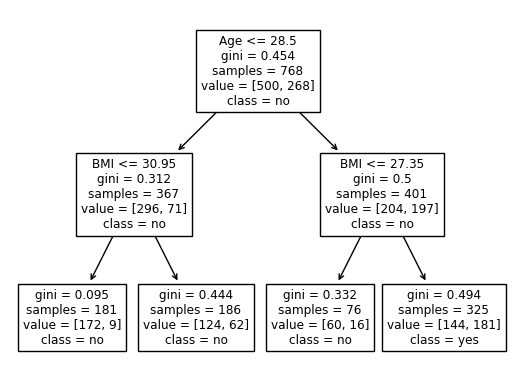

In [6]:
from sklearn.tree import plot_tree
plot_tree(model, feature_names=list(X1.columns), class_names=['no','yes'])

In [7]:
new_data=X1.sample(10)
new_data

,Pregnancies,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
283,7,86,0,0,30.4,0.165,47
649,0,60,25,0,26.4,0.133,23
453,2,0,0,0,19.6,0.832,72
410,6,90,39,0,35.7,0.674,28
307,0,68,14,148,24.8,0.143,21
342,1,68,35,0,32.0,0.389,22
632,2,60,0,0,26.2,0.343,23
498,7,70,33,145,25.1,0.163,55
32,3,58,11,54,24.8,0.267,22
536,0,90,0,0,29.6,0.197,46


In [8]:
model.predict(new_data)

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 1])

### Compare KNN and Decision Trees

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

What do we need to compare these two models?

+ baseline
+ metric (precision, recall)
+ cross validator

In [10]:
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import cross_validate, ShuffleSplit

baseline = DummyClassifier(strategy='stratified')
ss = ShuffleSplit(n_splits=100)


In [11]:
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']
result_baseline = cross_validate(baseline, X, y, cv=ss, scoring=['f1'])
print(result_baseline['test_f1'].mean().round(2))

0.33


In [12]:
from sklearn.preprocessing import StandardScaler
knn = KNeighborsClassifier()
X = diabetes.drop(columns=['Outcome'])
X = StandardScaler().fit_transform(X)
y = diabetes['Outcome']
result_baseline = cross_validate(knn, X, y, cv=ss, scoring=['f1'])
print(result_baseline['test_f1'].mean().round(2))


0.6


In [13]:
dt = DecisionTreeClassifier()
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']
result_baseline = cross_validate(dt, X, y, cv=ss, scoring=['f1'])
print(result_baseline['test_f1'].mean().round(2))


0.57


#### Finding the right max depth for DT

In [14]:
for d in range(3,20):
    dt = DecisionTreeClassifier(max_depth=d)
    X = diabetes.drop(columns=['Outcome'])
    y = diabetes['Outcome']
    result_baseline = cross_validate(dt, X, y, cv=ss, scoring=['f1'])
    print(d, result_baseline['test_f1'].mean().round(2))


3 0.57
4 0.6
5 0.61
6 0.59
7 0.58
8 0.58
9 0.58
10 0.57
11 0.57
12 0.59
13 0.59
14 0.59
15 0.58
16 0.57
17 0.57
18 0.58
19 0.57


### Random Forest

In [15]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=5)
X = diabetes.drop(columns=['Outcome'])
y = diabetes['Outcome']
result = cross_validate(rf, X, y, cv=ss, scoring=['f1'])
print(result['test_f1'].mean().round(2))


0.61


In [16]:
rf.fit(X,y)

RandomForestClassifier(max_depth=5)

In [17]:
new_data = X.sample(5)
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
22,7,196,90,0,0,39.8,0.451,41
612,7,168,88,42,321,38.2,0.787,40
613,6,105,80,28,0,32.5,0.878,26
602,1,124,74,36,0,27.8,0.100,30
208,1,96,64,27,87,33.2,0.289,21


In [18]:
rf.predict(new_data)

array([1, 1, 0, 0, 0])

In [19]:
rf.predict_proba(new_data).round(2)

array([[0.18, 0.82],
       [0.13, 0.87],
       [0.71, 0.29],
       [0.73, 0.27],
       [0.9 , 0.1 ]])

In [20]:
rf.feature_importances_

array([0.07570361, 0.36603087, 0.04511425, 0.04357959, 0.06594219,
       0.16523928, 0.1004724 , 0.13791781])

In [24]:
X.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [21]:
sorted(list(zip(rf.feature_importances_, X.columns)))

[(0.04357959371394262, 'SkinThickness'),
 (0.045114253801029146, 'BloodPressure'),
 (0.06594218539032182, 'Insulin'),
 (0.0757036070318749, 'Pregnancies'),
 (0.1004724026137598, 'DiabetesPedigreeFunction'),
 (0.13791780514268512, 'Age'),
 (0.16523927870307437, 'BMI'),
 (0.3660308736033122, 'Glucose')]

[Text(0.5510204081632653, 0.9166666666666666, 'Glucose <= 132.5\ngini = 0.454\nsamples = 487\nvalue = [500, 268]'),
 Text(0.32142857142857145, 0.75, 'Insulin <= 145.0\ngini = 0.299\nsamples = 326\nvalue = [432, 97]'),
 Text(0.16326530612244897, 0.5833333333333334, 'Glucose <= 111.5\ngini = 0.27\nsamples = 282\nvalue = [385, 74]'),
 Text(0.08163265306122448, 0.4166666666666667, 'BMI <= 28.95\ngini = 0.173\nsamples = 192\nvalue = [284, 30]'),
 Text(0.04081632653061224, 0.25, 'Pregnancies <= 6.5\ngini = 0.017\nsamples = 79\nvalue = [118, 1]'),
 Text(0.02040816326530612, 0.08333333333333333, 'gini = 0.0\nsamples = 74\nvalue = [113, 0]'),
 Text(0.061224489795918366, 0.08333333333333333, 'gini = 0.278\nsamples = 5\nvalue = [5, 1]'),
 Text(0.12244897959183673, 0.25, 'BloodPressure <= 51.0\ngini = 0.253\nsamples = 113\nvalue = [166, 29]'),
 Text(0.10204081632653061, 0.08333333333333333, 'gini = 0.5\nsamples = 6\nvalue = [4, 4]'),
 Text(0.14285714285714285, 0.08333333333333333, 'gini = 0.232\ns

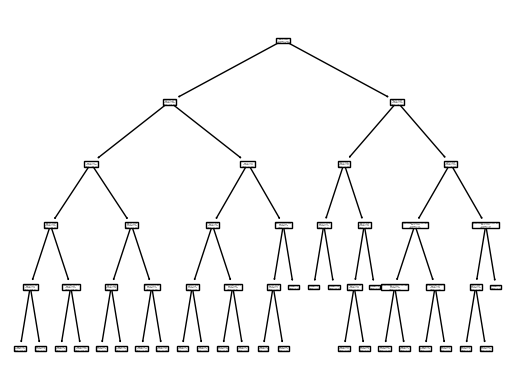

In [22]:
plot_tree(rf.estimators_[0], feature_names=list(X.columns))

There are modules like dtreeviz that allows you to visualize decision trees. 

## F1 score formula:

F1= (2×precision×recall)/ (precision+recall)


